In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor  

In [2]:
!pwd

/c/Users/avalencia/Documents/Flatiron/phase_2/project/bsc-phase-two-project/notebooks/exploratory/Alex


In [3]:
# Pull Dataframe
path = '../../../data/kc_house_data.csv'

df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Dropped the house with 33 bathrooms
df.drop(15856)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
# Replace all NaN values to 0.
df = df.replace(np.nan, 0)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
# Convert price from float to integer
df.price = df.price.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int32  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [10]:
df = df.loc[(df['bathrooms'] > 0.5) & (df['bathrooms'] < 5.75)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Text(0, 0.5, 'Price')

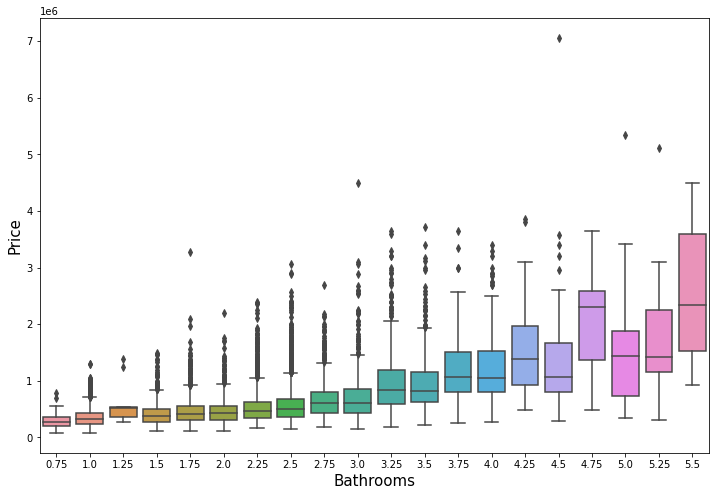

In [11]:
# Boxplot showing relationship between price and bathrooms
plt.figure(figsize=(12,8))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [12]:
# Filter dataframe with 3 highest correlated varibales to price
df_new = df[['price', 'sqft_living', 'bathrooms', 'grade']]
df_new.head(10)

,price,sqft_living,bathrooms,grade
0,221900,1180,1.00,7
1,538000,2570,2.25,7
2,180000,770,1.00,6
3,604000,1960,3.00,7
4,510000,1680,2.00,8
5,1230000,5420,4.50,11
6,257500,1715,2.25,7
7,291850,1060,1.50,7
8,229500,1780,1.00,7
9,323000,1890,2.50,7


In [13]:
def bathroom(x):
    if x <= 1.50:
        return 'small'
    elif x <= 3.00:
        return 'middle'
    else:
        return 'large'

In [14]:
df_new['bathroom_count'] = df_new.bathrooms.apply(bathroom)
df_new.head(10)

<ipython-input-14-d97d1a310526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['bathroom_count'] = df_new.bathrooms.apply(bathroom)


,price,sqft_living,bathrooms,grade,bathroom_count
0,221900,1180,1.00,7,small
1,538000,2570,2.25,7,middle
2,180000,770,1.00,6,small
3,604000,1960,3.00,7,middle
4,510000,1680,2.00,8,middle
5,1230000,5420,4.50,11,large
6,257500,1715,2.25,7,middle
7,291850,1060,1.50,7,small
8,229500,1780,1.00,7,small
9,323000,1890,2.50,7,middle


Text(0, 0.5, 'Price')

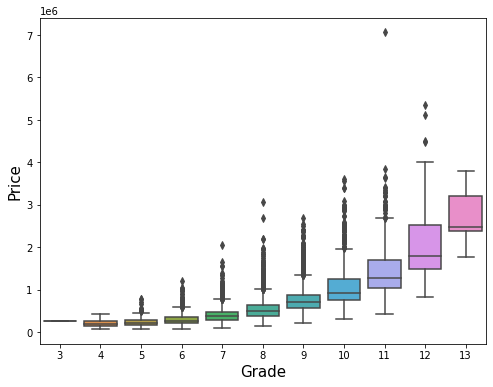

In [15]:
# Boxplot showing relationship between price and grade
plt.figure(figsize=(8,6))
sns.boxplot(x=df_new['grade'], y=df_new['price'])
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Price', fontsize=15)

<AxesSubplot:>

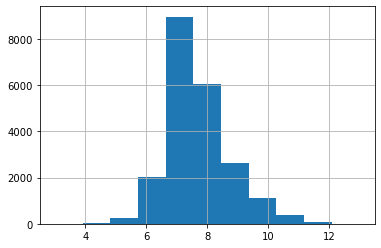

In [16]:
# Histogram of Grade
df_new['grade'].hist(bins=11)

In [17]:
def bin_grade(x):
    if x <= 6:
        return 'Poor'
    elif x <= 10:
        return 'Average'
    else:
        return 'Great'

In [18]:
df_new['grade_bins'] = df_new.grade.apply(bin_grade)
df_new.head(10)

<ipython-input-18-2438ab39545d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['grade_bins'] = df_new.grade.apply(bin_grade)


,price,sqft_living,bathrooms,grade,bathroom_count,grade_bins
0,221900,1180,1.00,7,small,Average
1,538000,2570,2.25,7,middle,Average
2,180000,770,1.00,6,small,Poor
3,604000,1960,3.00,7,middle,Average
4,510000,1680,2.00,8,middle,Average
5,1230000,5420,4.50,11,large,Great
6,257500,1715,2.25,7,middle,Average
7,291850,1060,1.50,7,small,Average
8,229500,1780,1.00,7,small,Average
9,323000,1890,2.50,7,middle,Average


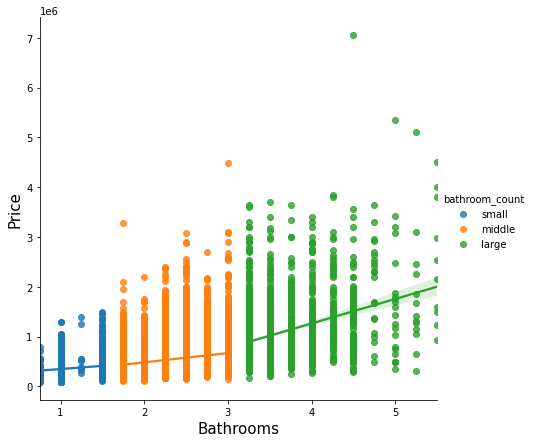

In [19]:
sns.lmplot(x='bathrooms', y='price', data=df_new, hue='bathroom_count', height=6)

plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)

plt.show()

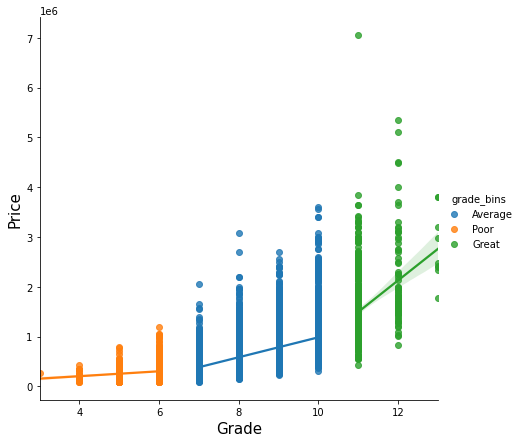

In [20]:
sns.lmplot(x='grade', y='price', data=df_new, hue='grade_bins', height=6)

plt.ylabel('Price', size=15)
plt.xlabel('Grade', size=15)

plt.show()

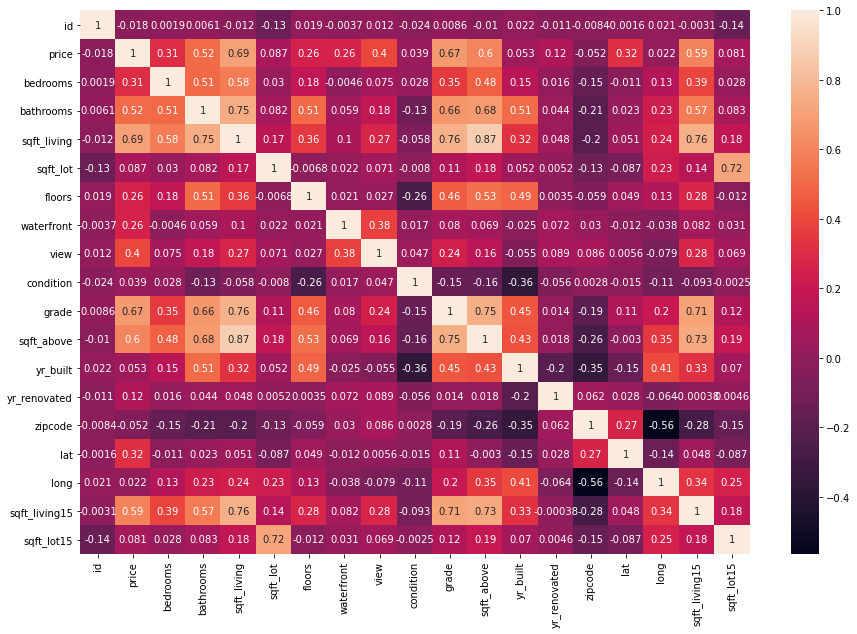

In [21]:
# Heatmap showing correlations
plt.figure(figsize=(15,10))

ax = sns.heatmap(df.corr(), annot=True);

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

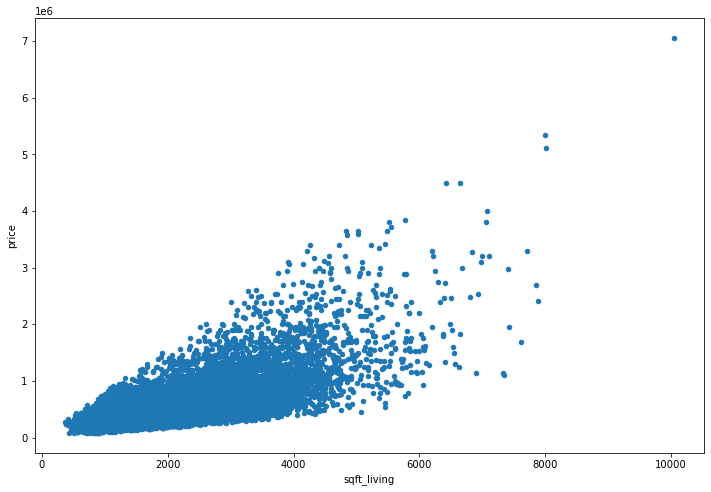

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=ax)

In [23]:
# Top 10 Zipcodes Based on Price
top = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[:10]
top.sort_values('price', ascending=True, inplace=True)
top

,zipcode,price
4,98005,8.102897e+05
41,98102,8.335844e+05
5,98006,8.481604e+05
53,98119,8.497148e+05
43,98105,8.632289e+05
47,98109,8.800778e+05
48,98112,1.096239e+06
25,98040,1.167801e+06
3,98004,1.354013e+06
24,98039,1.956702e+06


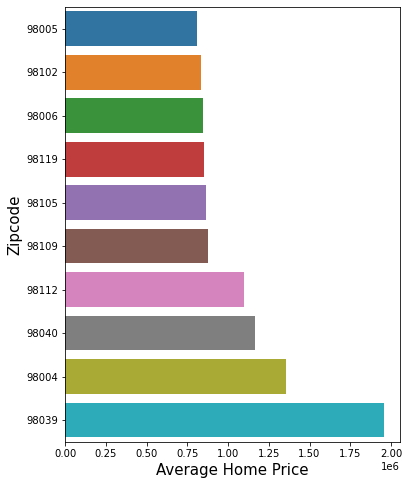

In [24]:
# Boxplot showing relatiionship between zipcode and price
plt.figure(figsize=(6,8))

sns.barplot(x='price', y='zipcode' , order=top['zipcode'], orient='h', data = top)

plt.ylabel('Zipcode', size=15)
plt.xlabel('Average Home Price', size=15)

plt.show()

In [25]:
top_10_zipcodes = (98039, 98004, 98040, 98112, 98109, 98105, 98119, 98006, 98102, 98005)

In [26]:
# Houses within the top 10 zipcodes
df1 = df[df['zipcode'].isin(top_10_zipcodes)]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,8/26/2014,2000000,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
26,1794500383,6/26/2014,937000,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,0.0,98119,47.6386,-122.360,1760,3573
27,3303700376,12/1/2014,667000,3,1.00,1400,1581,1.5,0.0,0.0,...,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
43,9270200160,10/28/2014,685000,3,1.00,1570,2280,2.0,0.0,0.0,...,7,1570,0.0,1922,0.0,98119,47.6413,-122.364,1580,2640
54,4217401195,3/3/2015,920000,5,2.25,2730,6000,1.5,0.0,0.0,...,8,2130,600.0,1927,0.0,98105,47.6571,-122.281,2730,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1/30/2015,1700000,4,3.50,3830,8963,2.0,0.0,0.0,...,10,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21563,7011201004,5/29/2014,645000,3,3.25,1730,1229,2.0,0.0,2.0,...,9,1320,410.0,2008,0.0,98119,47.6374,-122.369,1710,1686
21567,2025049203,6/10/2014,399950,2,1.00,710,1157,2.0,0.0,0.0,...,7,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21581,191100405,4/21/2015,1580000,4,3.25,3410,10125,2.0,0.0,0.0,...,10,3410,?,2007,0.0,98040,47.5653,-122.223,2290,10125


In [27]:
# Pulling the descriptive stats for price.
df1.describe()['price']

count    2.200000e+03
mean     1.015222e+06
std      5.707713e+05
min      1.693170e+05
25%      6.489380e+05
50%      8.500000e+05
75%      1.230000e+06
max      7.060000e+06
Name: price, dtype: float64

In [28]:
import statsmodels.api as sm

#instatiate OLS model 
model = sm.OLS(df1["price"], sm.add_constant(df1["sqft_living"])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3349.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:24:32   Log-Likelihood:                -31263.
No. Observations:                2200   AIC:                         6.253e+04
Df Residuals:                    2198   BIC:                         6.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3544.1584   1.91e+04      0.186      0.853   -3.39e+04     4.1e+04
sqft_living   385.4797      6.661     57.870      0.000     372.417     398.542
==============================================================================
Omnibus:                      681.641   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4498.502
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       9.510   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

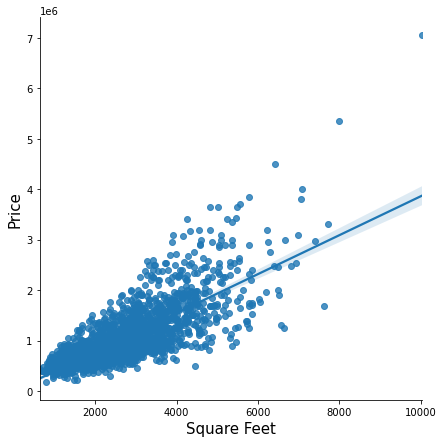

In [29]:
sns.lmplot(x='sqft_living', y='price', data=df1, height=6)

plt.ylabel('Price', fontsize=15)
plt.xlabel('Square Feet', fontsize=15)
plt.show()

In [30]:
df.zipcode.value_counts()[:20]

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    506
98023    499
98006    495
98133    493
98059    468
98058    455
98155    444
98074    441
98033    432
98027    411
98125    409
98056    406
98053    401
Name: zipcode, dtype: int64

In [31]:
# Top 20 zipcodes with at least 400 homes for sale.
pop_20_zipcodes = (98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023, 98006, 98133,
                   98059, 98058, 98155, 98074, 98033, 98027, 98125, 98056, 98053)

In [32]:
df2 = df[df['zipcode'].isin(pop_20_zipcodes)]
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,7202300110,9/15/2014,810000,4,3.00,3990,7838,2.0,0.0,0.0,...,9,3990,0.0,2003,0.0,98053,47.6857,-122.046,3370,6814
21585,5100403806,4/7/2015,467000,3,2.50,1425,1179,3.0,0.0,0.0,...,8,1425,0.0,2008,0.0,98125,47.6963,-122.318,1285,1253
21589,3448900210,10/14/2014,610685,4,2.50,2520,6023,2.0,0.0,0.0,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509


In [33]:
df2.describe()['price']

count    9.853000e+03
mean     5.229977e+05
std      2.860131e+05
min      8.650000e+04
25%      3.420000e+05
50%      4.550000e+05
75%      6.270000e+05
max      5.110000e+06
Name: price, dtype: float64

In [34]:
# Correlate price to variables
df2.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.696177
grade            0.668770
sqft_above       0.602997
sqft_living15    0.583259
bathrooms        0.516426
view             0.449502
waterfront       0.349727
bedrooms         0.290448
lat              0.276964
floors           0.245510
yr_built         0.139622
sqft_lot         0.129988
sqft_lot15       0.128180
long             0.108846
yr_renovated     0.066151
id              -0.005219
condition       -0.044842
zipcode         -0.097163
Name: price, dtype: float64

Text(0, 0.5, 'Price')

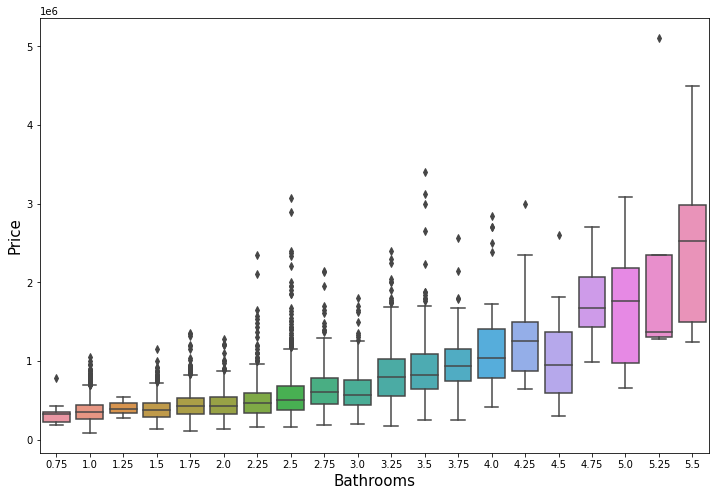

In [35]:
# Boxplot showing relationship between price and bathrooms
plt.figure(figsize=(12,8))
sns.boxplot(x=df2['bathrooms'], y=df2['price'])
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [36]:
# Filter dataframe with 3 highest correlated varibales to price
df3 = df2[['price', 'sqft_living', 'bathrooms', 'grade']]
df3.head(10)

,price,sqft_living,bathrooms,grade
1,538000,2570,2.25,7
4,510000,1680,2.00,8
5,1230000,5420,4.50,11
9,323000,1890,2.50,7
11,468000,1160,1.00,7
13,400000,1370,1.75,7
17,485000,1600,1.00,7
20,385000,1620,1.75,7
28,438000,1520,1.75,7
29,719000,2570,2.50,8


In [37]:
def bathroom_2(x):
    if x <= 1.50:
        return 'small'
    elif x <= 3.00:
        return 'middle'
    else:
        return 'large'

In [38]:
df3['bathroom_count'] = df3.bathrooms.apply(bathroom_2)
df3.head(10)

<ipython-input-38-9d651bfb023a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bathroom_count'] = df3.bathrooms.apply(bathroom_2)


,price,sqft_living,bathrooms,grade,bathroom_count
1,538000,2570,2.25,7,middle
4,510000,1680,2.00,8,middle
5,1230000,5420,4.50,11,large
9,323000,1890,2.50,7,middle
11,468000,1160,1.00,7,small
13,400000,1370,1.75,7,middle
17,485000,1600,1.00,7,small
20,385000,1620,1.75,7,middle
28,438000,1520,1.75,7,middle
29,719000,2570,2.50,8,middle


Text(0, 0.5, 'Price')

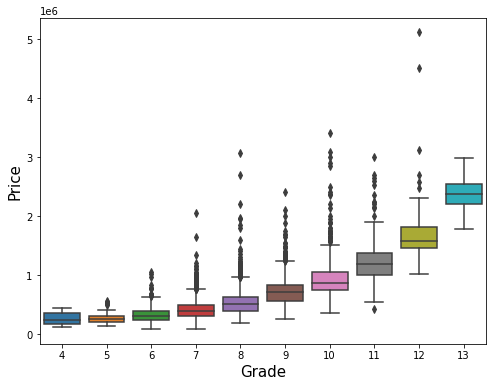

In [39]:
# Boxplot showing relationship between price and grade
plt.figure(figsize=(8,6))
sns.boxplot(x=df2['grade'], y=df2['price'])
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [40]:
def bins_grade(x):
    if x <= 6:
        return 'Poor'
    elif x <= 10:
        return 'Average'
    else:
        return 'Great'

In [41]:
df3['grade_bins'] = df3.grade.apply(bins_grade)
df3.head(10)

<ipython-input-41-2c10ca17acad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['grade_bins'] = df3.grade.apply(bins_grade)


,price,sqft_living,bathrooms,grade,bathroom_count,grade_bins
1,538000,2570,2.25,7,middle,Average
4,510000,1680,2.00,8,middle,Average
5,1230000,5420,4.50,11,large,Great
9,323000,1890,2.50,7,middle,Average
11,468000,1160,1.00,7,small,Average
13,400000,1370,1.75,7,middle,Average
17,485000,1600,1.00,7,small,Average
20,385000,1620,1.75,7,middle,Average
28,438000,1520,1.75,7,middle,Average
29,719000,2570,2.50,8,middle,Average


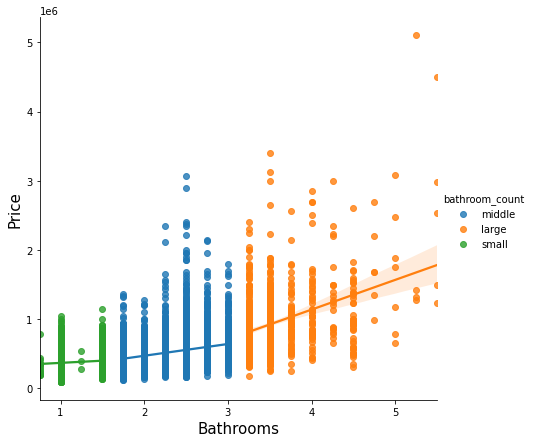

In [42]:
sns.lmplot(x='bathrooms', y='price', data=df3, hue='bathroom_count', height=6)

plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)

plt.show()

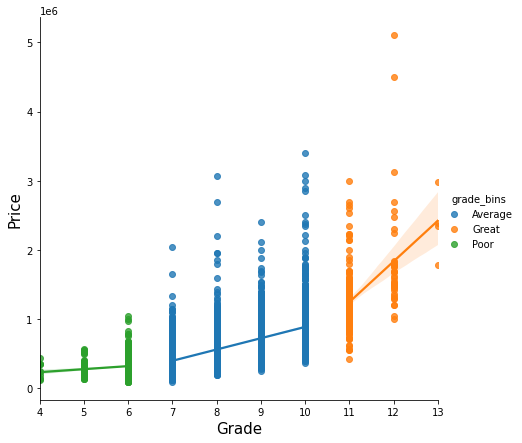

In [43]:
sns.lmplot(x='grade', y='price', data=df3, hue='grade_bins', height=6)

plt.ylabel('Price', size=15)
plt.xlabel('Grade', size=15)

plt.show()

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


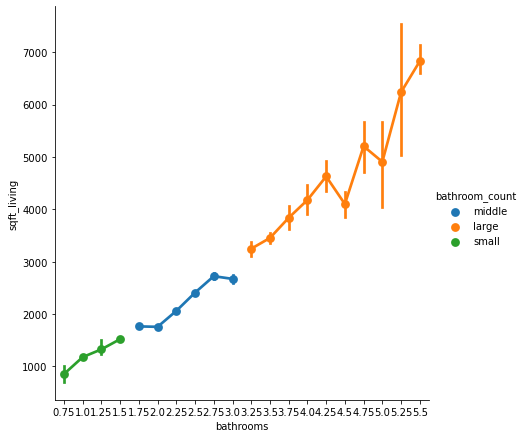

In [44]:
# Create factorplot for relationship between Bathrooms and Sqft_Living
sns.factorplot(data=df3, x='bathrooms', y='sqft_living', hue='bathroom_count', height=6)

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


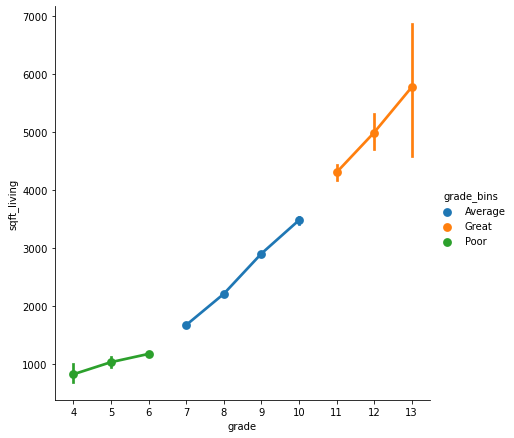

In [45]:
# Create factorplot for relationship between Grade and Sqft_Living
sns.factorplot(data=df3, x='grade', y='sqft_living', hue='grade_bins', height=6)

In [46]:
# Run simple regression with StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'price ~ sqft_living'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     9265.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:25:09   Log-Likelihood:            -1.3451e+05
No. Observations:                9853   AIC:                         2.690e+05
Df Residuals:                    9851   BIC:                         2.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.146e+04   5317.768      9.677      0.000     4.1e+04    6.19e+04
sqft_living   226.7848      2.356     96.253      0.000     222.166     231.403
==============================================================================
Omnibus:                     6544.236   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244745.587
Skew:                           2.669   Prob(JB):                         0.00
Kurtosis:                      26.826   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#imports 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['sqft_living']
X = df2[features]
y = df2.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

51459.34614773019
[226.78482919]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split our data into training/testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #test_size 0.25 and train_size 0.75 by default.
print(len(X_train), len(X_test), len(y_train), len(y_test))

7389 2464 7389 2464


In [49]:
X_train.shape, X_test.shape

((7389, 1), (2464, 1))

In [50]:
#instantiate and fit 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
# calculate predictions on training and test sets
y_hat_train = lin_reg.predict(X_train)
y_hat_test = lin_reg.predict(X_test)

In [52]:
#compare MSE for the predicted training and test values 
train_mse = mean_squared_error(y_train, y_hat_train) #actual vs. train values
test_mse = mean_squared_error(y_test, y_hat_test)    #actual vs. test values

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train score:', lin_reg.score(X_train, y_train))
print('Test score:', lin_reg.score(X_test, y_test))

Train Mean Squarred Error: 43058889887.741264
Test Mean Squarred Error: 39436376022.16952
Train score: 0.4809156739510595
Test score: 0.49632828780677496


In [53]:
# adjusted R-squared
print(1 - ( 1 - lin_reg.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))
print(1 - ( 1 - lin_reg.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

0.48084540397325404
0.49612370953212304


In [54]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(lin_reg, X, y, cv=5)

cv_results

array([0.45929337, 0.48688826, 0.44543317, 0.48154829, 0.5306294 ])

In [55]:
#sklearn

features = ['sqft_living', 'grade', 'bathrooms']
X = df2[features]                      #multiple variables create matrices and it's why variable is X.
y = df2.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))

# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[   161.60815311  86346.46560219 -31836.23597932]
0.5320120629259009
0.5318695140568561


In [56]:
list(zip(features, mlr.coef_))

[('sqft_living', 161.60815311074046),
 ('grade', 86346.4656021911),
 ('bathrooms', -31836.235979320183)]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split our data into training/testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #test_size 0.25 and train_size 0.75 by default.
print(len(X_train), len(X_test), len(y_train), len(y_test))

7389 2464 7389 2464


In [58]:
#instantiate and fit 
mlr_split = LinearRegression()

#fit - model is learning just from that training data
mlr_split.fit(X_train, y_train)

# calculate predictions on training and test sets
y_hat_train = mlr_split.predict(X_train)
y_hat_test = mlr_split.predict(X_test)

#compare MSE for the predicted training and test values 
train_mse = mean_squared_error(y_train, y_hat_train) #actual vs. train values
test_mse = mean_squared_error(y_test, y_hat_test)    #actual vs. test values
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train score:', mlr_split.score(X_train, y_train))
print('Test score:', mlr_split.score(X_test, y_test))

Train Mean Squarred Error: 38730172536.555405
Test Mean Squarred Error: 37008436160.097275
Train score: 0.5330993074528692
Test score: 0.5273373396208831


In [59]:
# adjusted R-squared
print(1 - ( 1 - mlr_split.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))
print(1 - ( 1 - mlr_split.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

0.532909638925091
0.526760921742372


In [60]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(mlr, X, y, cv=5)

cv_results

array([0.4921165 , 0.53401627, 0.50178494, 0.52857852, 0.58485964])

### Create path for Excel spreadsheet

In [61]:
path = '../../../data/king_co_zipcodes.xlsx'

zip_code_names = pd.read_excel(path)

In [62]:
zip_code_names

,zipcode,zipcodename,population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714
...,...,...,...
80,98288,Skykomish,333
81,98321,Buckley,15152
82,98354,Milton,6976
83,98826,Leavenworth,6504


### Merge spreadsheet with original DataFrame

In [64]:
df_merge = pd.merge(df, zip_code_names, on='zipcode')
df_merge

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcodename,population
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle,24092
1,4060000240,6/23/2014,205425,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,Seattle,24092
2,4058801670,7/17/2014,445000,3,2.25,2100,8201,1.0,0.0,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,Seattle,24092
3,2976800796,9/25/2014,236000,3,1.00,1300,5898,1.0,0.0,0.0,...,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,Seattle,24092
4,6874200960,2/27/2015,170000,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,Seattle,24092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,2525049086,10/3/2014,2720000,4,3.25,3990,18115,2.0,0.0,0.0,...,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,Medina,2971
21569,2525049113,7/25/2014,1950000,4,3.50,4065,18713,2.0,0.0,0.0,...,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,Medina,2971
21570,3262300485,4/21/2015,2250000,5,5.25,3410,8118,2.0,0.0,0.0,...,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,Medina,2971
21571,6447300365,11/13/2014,2900000,5,4.00,5190,14600,2.0,0.0,1.0,...,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,Medina,2971


### Rename column from 'zipcodename' to 'municipality'

In [67]:
df_merge = df_merge.rename(columns={'zipcodename': 'municipality'})
df_merge

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,municipality,population
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Seattle,24092
1,4060000240,6/23/2014,205425,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,Seattle,24092
2,4058801670,7/17/2014,445000,3,2.25,2100,8201,1.0,0.0,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,Seattle,24092
3,2976800796,9/25/2014,236000,3,1.00,1300,5898,1.0,0.0,0.0,...,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,Seattle,24092
4,6874200960,2/27/2015,170000,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,Seattle,24092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,2525049086,10/3/2014,2720000,4,3.25,3990,18115,2.0,0.0,0.0,...,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,Medina,2971
21569,2525049113,7/25/2014,1950000,4,3.50,4065,18713,2.0,0.0,0.0,...,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,Medina,2971
21570,3262300485,4/21/2015,2250000,5,5.25,3410,8118,2.0,0.0,0.0,...,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,Medina,2971
21571,6447300365,11/13/2014,2900000,5,4.00,5190,14600,2.0,0.0,1.0,...,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,Medina,2971


In [68]:
pd.get_dummies(df_merge, columns=['municipality'], drop_first=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,municipality_Medina,municipality_Mercer Island,municipality_North Bend,municipality_Redmond,municipality_Renton,municipality_Sammamish,municipality_Seattle,municipality_Snoqualmie,municipality_Vashon,municipality_Woodinville
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,4060000240,6/23/2014,205425,2,1.00,880,6780,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,4058801670,7/17/2014,445000,3,2.25,2100,8201,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
3,2976800796,9/25/2014,236000,3,1.00,1300,5898,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,6874200960,2/27/2015,170000,2,1.00,860,5265,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,2525049086,10/3/2014,2720000,4,3.25,3990,18115,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21569,2525049113,7/25/2014,1950000,4,3.50,4065,18713,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21570,3262300485,4/21/2015,2250000,5,5.25,3410,8118,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21571,6447300365,11/13/2014,2900000,5,4.00,5190,14600,2.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


## OneHotEncoder

In [113]:
# OneHotEncoder and new dataframe df_ohe
ohe = OneHotEncoder(sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df_merge[['municipality']]), columns=ohe.get_feature_names())
df_ohe

,x0_Auburn,x0_Bellevue,x0_Black Diamond,x0_Bothell,x0_Carnation,x0_Duvall,x0_Enumclaw,x0_Fall City,x0_Federal Way,x0_Issaquah,...,x0_Medina,x0_Mercer Island,x0_North Bend,x0_Redmond,x0_Renton,x0_Sammamish,x0_Seattle,x0_Snoqualmie,x0_Vashon,x0_Woodinville
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_merge.groupby('municipality')['zipcode'].count()

municipality
Auburn            910
Bellevue         1403
Black Diamond     100
Bothell           195
Carnation         124
Duvall            190
Enumclaw          233
Fall City          80
Federal Way       779
Issaquah          732
Kenmore           283
Kent             1201
Kirkland          977
Maple Valley      589
Medina             47
Mercer Island     280
North Bend        219
Redmond           975
Renton           1597
Sammamish         799
Seattle          8965
Snoqualmie        308
Vashon            117
Woodinville       470
Name: zipcode, dtype: int64

### Group 'municipality' and 'zipcode'

In [109]:
df10 = df_merge.groupby(['municipality','zipcode']).count()
df10.head(20)

id  date  price  bedrooms  bathrooms  sqft_living  \
municipality  zipcode                                                       
Auburn        98001    361   361    361       361        361          361   
              98002    199   199    199       199        199          199   
              98092    350   350    350       350        350          350   
Bellevue      98004    316   316    316       316        316          316   
              98005    168   168    168       168        168          168   
              98006    495   495    495       495        495          495   
              98007    141   141    141       141        141          141   
              98008    283   283    283       283        283          283   
Black Diamond 98010    100   100    100       100        100          100   
Bothell       98011    195   195    195       195        195          195   
Carnation     98014    124   124    124       124        124          124   
Duvall        98019    190   190    190       190        190          190   
Enumclaw      98022    233   233    233       233        233          233   
Fall City     98024     80    80     80        80         80           80   
Federal Way   98003    280   280    280       280        280          280   
              98023    499   499    499       499        499          499   
Issaquah      98027    411   411    411       411        411          411   
              98029    321   321    321       321        321          321   
Kenmore       98028    283   283    283       283        283          283   
Kent          98030    256   256    256       256        256          256   

                       sqft_lot  floors  waterfront  view  ...  grade  \
municipality  zipcode                                      ...          
Auburn        98001         361     361         361   361  ...    361   
              98002         199     199         199   199  ...    199   
              98092         350     350         350   350  ...    350   
Bellevue      98004         316     316         316   316  ...    316   
              98005         168     168         168   168  ...    168   
              98006         495     495         495   495  ...    495   
              98007         141     141         141   141  ...    141   
              98008         283     283         283   283  ...    283   
Black Diamond 98010         100     100         100   100  ...    100   
Bothell       98011         195     195         195   195  ...    195   
Carnation     98014         124     124         124   124  ...    124   
Duvall        98019         190     190         190   190  ...    190   
Enumclaw      98022         233     233         233   233  ...    233   
Fall City     98024          80      80          80    80  ...     80   
Federal Way   98003         280     280         280   280  ...    280   
              98023         499     499         499   499  ...    499   
Issaquah      98027         411     411         411   411  ...    411   
              98029         321     321         321   321  ...    321   
Kenmore       98028         283     283         283   283  ...    283   
Kent          98030         256     256         256   256  ...    256   

                       sqft_above  sqft_basement  yr_built  yr_renovated  lat  \
municipality  zipcode                                                           
Auburn        98001           361            361       361           361  361   
              98002           199            199       199           199  199   
              98092           350            350       350           350  350   
Bellevue      98004           316            316       316           316  316   
              98005           168            168       168           168  168   
              98006           495            495       495           495  495   
              98007           141            141       141           141  